# B3C-CTR1 Exercice 3.7

Considérez la réaction de cis-trans isomérisation du 2-butène en phase liquide, que nous décrivons symboliquement par la réaction:

$$A \to 𝐵$$

Cette réaction du premier ordre en A (k = 0.23 min<sup>-1</sup>) est effectuée dans un réacteur tubulaire avec un débit volumique constant de 10 L/min. La concentration initiale de A est de 3 mol/L.

* Tracer les profils de concentration de A et B le long du réacteur.
* Déterminer le volume du réacteur nécessaire pour une conversion de 0.9.


## Solution

On commence par importer les packages nécessaires pour la résolution

In [2]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

On configure le problème à résoudre en définissant les constantes et les conditions initiales.

In [3]:
# Définition des constantes
k = 0.23 # (1/min)
CA0 = 3 # mol/L
CB0 = 0 # mol/L
Vdot = 10 # L/min


In [6]:
# Définition des équations différentielles
def equations(y, V, k, Vdot):
    FA, FB = y
    
    CA = FA / Vdot
    
    r = k * CA
    
    RA = -r
    RB = r
    
    dFAdV = RA
    dFBdV = RB
    
    return [dFAdV, dFBdV]
    

In [7]:
# Conditions initiales et domaine d'intégration
y0 = [CA0 * Vdot, CB0 * Vdot]

# Domaine d'intégration
Vspan = np.linspace(0, 150, 151) # L



In [10]:
# Résolution
valeurs = odeint(equations, y0, Vspan, (k, Vdot))

valeurs = valeurs / Vdot




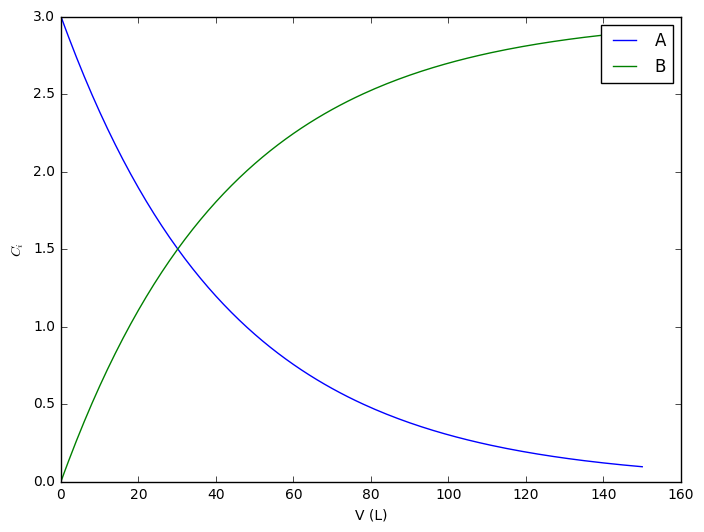

In [12]:
plt.figure(1, figsize=(8, 6), dpi=100)
plt.plot(Vspan, valeurs)
plt.xlabel('V (L)')
plt.ylabel('$C_{i}$')
plt.legend (['A','B'])
plt.show()